In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

folder = "logs_correct"
seed_choices = {"gold": [5, 25, 45, 50, 500], "gem": [10, 50, 90, 170, 290]}
total_eps_choices = {"gold": 20000, "gem": 25000}
store = {"gold": {'get[wood]': {'ep': [], 'r': [], 'l': []}, 'get[iron]': {'ep': [], 'r': [], 'l': []}, 'make[bridge]': {'ep': [], 'r': [], 'l': []}, 'get[gold]': {'ep': [], 'r': [], 'l': []}}, "gem": {'ep': {'ep': [], 'r': [], 'l': []}, 'get[wood]': {'ep': [], 'r': [], 'l': []}, 'get[iron]': {'ep': [], 'r': [], 'l': []}, 'make[stick]': {'ep': [], 'r': [], 'l': []}, 'make[axe]': {'ep': [], 'r': [], 'l': []}, 'get[gem]': {'ep': [], 'r': [], 'l': []}}}
for top_goal in ["gold", "gem"]:
    for seed in seed_choices[top_goal]:
        new_goal = False
        file = folder+"/"+"{}_{}_finetune.log".format(top_goal, seed)
        with open(file, "r") as f:
            for i, line in enumerate(f.readlines()):
                if "Currently working on goal" in line:
                    task = line.split()[-1]
                    new_goal = True
                elif new_goal and 'At episode' in line:
                    ep = float(line.split()[3])
                    store[top_goal][task]['ep'].append(ep)

                    avg_reward = float(line.split()[-1])
                    store[top_goal][task]['r'].append(avg_reward)

                    store[top_goal][task]['l'].append('option-templates')
                    if ep == 4980:
                        new_goal=False

folder = "../sticky_mittens_bottom_up/logs"
seed_choices = {"gold": [45, 50, 1020, 1025, 1000, 1005], 
                "gem": [25, 50, 1005, 1040, 1035]
                }
total_eps_choices = {"gold": 20000, "gem": 25000}
#store = {"gold": {'get[wood]': {'ep': [], 'r': [], 'l': []}, 'get[iron]': {'ep': [], 'r': [], 'l': []}, 'make[bridge]': {'ep': [], 'r': [], 'l': []}, 'get[gold]': {'ep': [], 'r': [], 'l': []}}, "gem": {'ep': {'ep': [], 'r': [], 'l': []}, 'get[wood]': {'ep': [], 'r': [], 'l': []}, 'get[iron]': {'ep': [], 'r': [], 'l': []}, 'make[stick]': {'ep': [], 'r': [], 'l': []}, 'make[axe]': {'ep': [], 'r': [], 'l': []}, 'get[gem]': {'ep': [], 'r': [], 'l': []}}}
for top_goal in ["gold", "gem"]:
    for seed in seed_choices[top_goal]:
        new_goal = False
        file = folder+"/"+"{}_{}.log".format(top_goal, seed)
        with open(file, "r") as f:
            for i, line in enumerate(f.readlines()):
                if "Currently working on goal" in line:
                    task = line.split()[-1]
                    new_goal = True
                elif new_goal and 'At episode' in line:
                    ep = float(line.split()[3])
                    store[top_goal][task]['ep'].append(ep)

                    avg_reward = float(line.split()[-1])
                    store[top_goal][task]['r'].append(avg_reward)

                    store[top_goal][task]['l'].append('baseline')
                    if ep == 4980:
                        new_goal=False


In [2]:
from matplotlib import pyplot as plt 
plt.rc('font', size=24)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

def plot(top_goal, task):
    plt.figure(figsize=(8,6))
    plt.title(task)
    dicti = {'episodes': store[top_goal][task]['ep'], 'avg reward': store[top_goal][task]['r'], '': store[top_goal][task]['l']}
    df = pd.DataFrame.from_dict(dicti)
    sns.lineplot(x='episodes', y='avg reward', hue='',
        data=df)

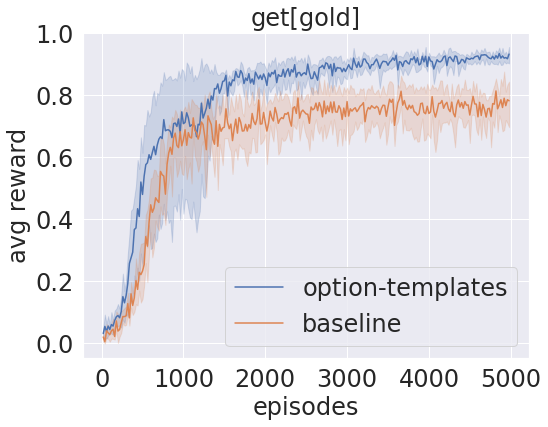

In [3]:
plot("gold", "get[gold]")

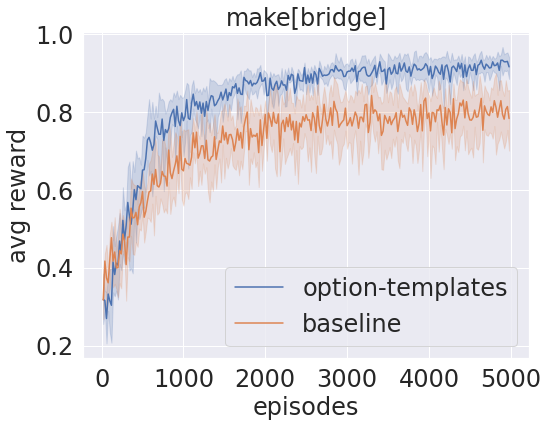

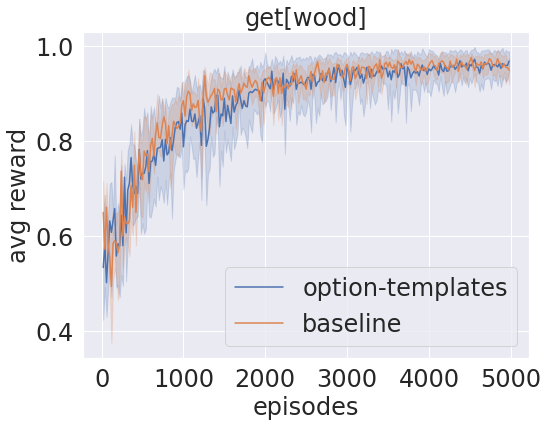

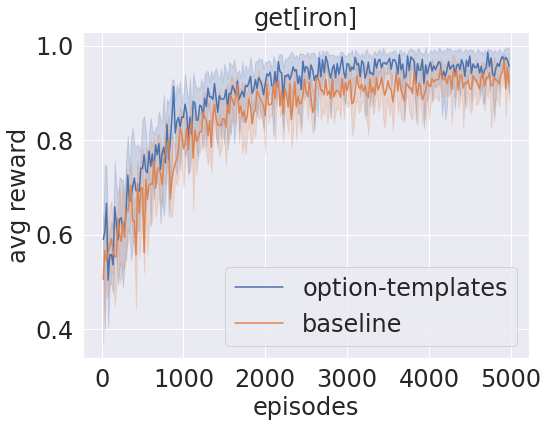

In [4]:
plot("gold", "make[bridge]")
plot("gold", "get[wood]")
plot("gold", "get[iron]")

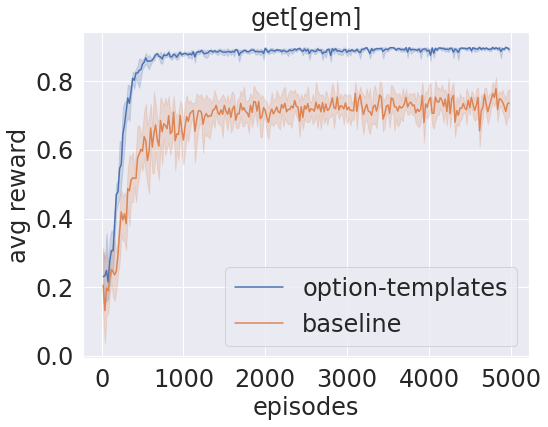

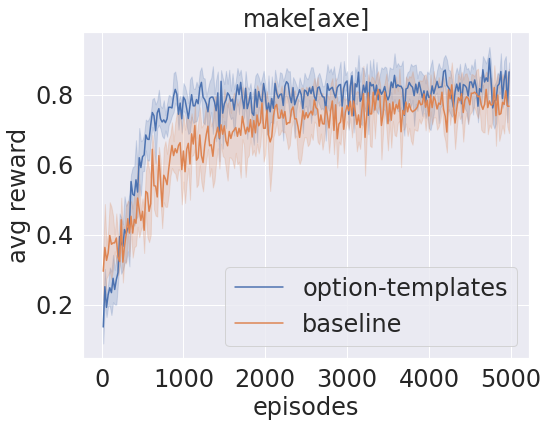

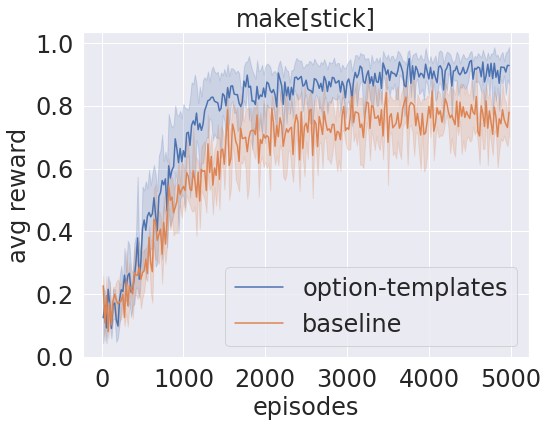

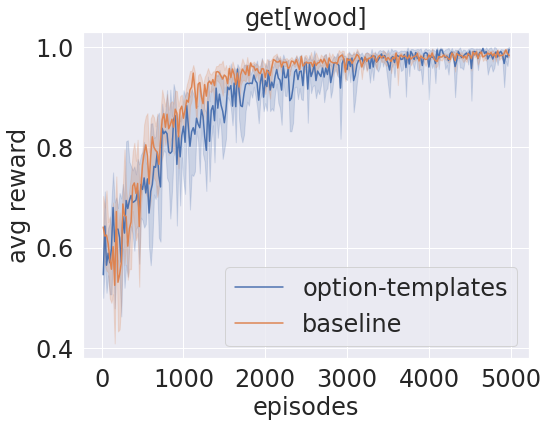

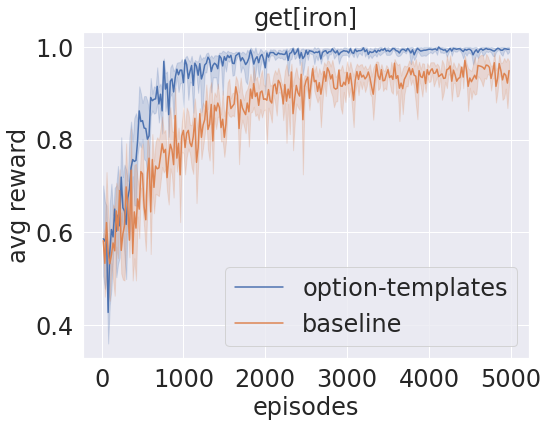

In [5]:
plot("gem", "get[gem]")
plot("gem", "make[axe]")
plot("gem", "make[stick]")
plot("gem", "get[wood]")
plot("gem", "get[iron]")